# Multilable (multiclass) Classification

### We will apply multilabel classification techniques to the MNIST handwriting dataset, which contains pictures of hand written digits. In MNIST, the feature space is high dimensional (pixels) and there are 10 possible outputs: 0, 1, 2, ..., 9.

<table>
    <tr><td>
        <img src="https://upload.wikimedia.org/wikipedia/commons/2/27/MnistExamples.png" width=300px>
        </td>
        </td><td width=20px>
            $$\Rightarrow$$
        </td>
        <td width=40px>
        <table><tr><td>0</td></tr><tr><td>1</td></tr><tr><td>2</td></tr><tr><td>3</td></tr>
        <tr><td>4</td></tr><tr><td>5</td></tr><tr><td>6</td></tr><tr><td>7</td></tr><tr><td>8</td></tr>
            <tr><td>9</td></tr>
        </table>
        </td>
    </tr>
</table>

In [1]:
# import libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
# reading the dataset
MNIST_train = pd.read_csv("train.csv") 
MNIST_test = pd.read_csv("train.csv")

# set training data and test data to the same set
y_train = np.array(MNIST_train["label"]) 
X_train = np.array(MNIST_train.drop(columns=["label"]))

y_test = np.array(MNIST_test["label"])
X_test = np.array(MNIST_test.drop(columns=["label"]))

print(X_train.shape) # there are 42000 data points each with 784=28x28 pixel values
print(y_train.shape) # each data point has a label: 0, 1, 2, ..., or 9

(42000, 784)
(42000,)


### 9 (a) Run the following to show the image and find out the label of the 701th data point. What is the label?

4


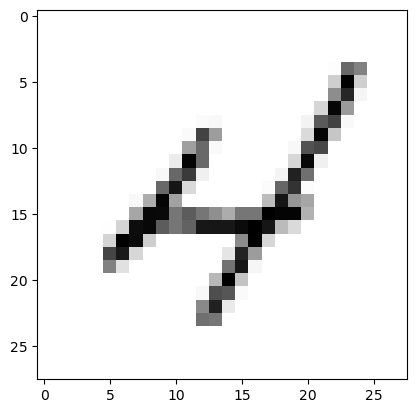

In [3]:
# look at the 701th data point
plt.imshow(X_train[700].reshape(28,28), cmap='Greys')
print(y_train[700])

### 9 (b) Run the following code, what is the training accuracy of the model?

In [4]:
from sklearn.linear_model import LogisticRegression # this is the multiclass (softmax) regression

clf = LogisticRegression(solver='lbfgs', max_iter=1000) # solver is the choice of different Gradient Descent methods
clf.fit(X_train[0:1000].reshape(-1, 28*28),y_train[0:1000]) # do the regression
print("Logistic Regression Score: %.3f"%clf.score(X_train.reshape(-1, 28*28),y_train)) 

Logistic Regression Score: 0.868


### 9(c) Run the following code to upload a new image, did it make a correct recognition? What is the meaning of the probability output?

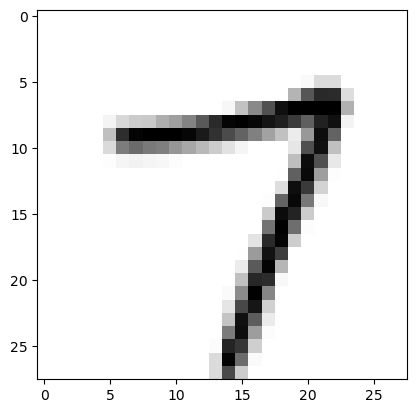

In [5]:
im = plt.imread("test_digit.png")
plt.imshow(im,cmap='Greys')

In [6]:
# `X_train` has data stored between 0 and 255, `im[:,:,0]` has the background as 1 and the foreground as 0
# We need to rescale `im[:,:,0]` to be on the same order as the classifier

mypic = 255*(1-im[:,:,0].reshape(1,-1))
print(clf.predict(mypic))
print(clf.predict_proba(mypic))

[7]
[[2.11698401e-09 1.45667932e-23 2.17239038e-07 3.73229930e-12
  1.57737490e-19 4.99872520e-08 9.83412394e-21 9.99999730e-01
  5.53434851e-10 9.29968870e-15]]


In [7]:
# The prabability output is the odds of the picture being classified as the digits between 0-9 respectively.
# So the probability of it being 7 is about 99.9999% while the others are displayed in the rest of the array in order.

### (Optional) Create a 28x28 picture with handwritten digit (black on white) and repeat 9(c), did you get a good result? Don't worry if you didn't!